In [1]:
#Importing the required librabries
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

In [2]:
#Loading data set in the pandas dataframe as df
df=pd.read_csv('E:\JUPYTER NOTE BOOK\Dataset/dataset for project.csv')
df.head()

,Thickness,Current,Voltage,welding speed,width,DOP,Throat,Leg size
0,10,310,28,9.25,4.7,1.8,4.2,4.9
1,3,175,25,7.00,5.0,1.0,4.0,4.4
2,6,175,18,5.00,5.6,1.2,4.6,4.3
3,4,125,30,4.00,4.1,1.6,5.0,4.5
4,6,275,30,8.00,5.0,1.8,4.8,5.0


# Width

In [3]:
#Making dependent and independent variables
x=df.iloc[:,:4]
y=df['width']

In [4]:
#Using train test split ,split the data set set into tarin and test part
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.15,random_state=4)

In [5]:
#scaling done by minmax scalar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#creating regression object
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.6733347267450518

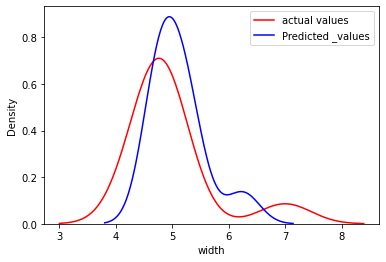

In [7]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.15,random_state=3)

<AxesSubplot:>

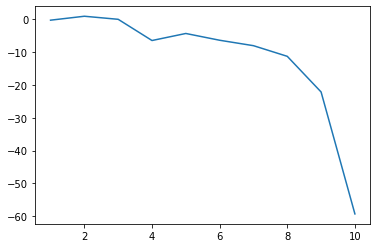

In [9]:
requ_test=[]
order=[1,2,3,4,5,6,7,8,9,10]
for i in order:
  pr=PolynomialFeatures(degree=i)
  x_train_pr=pr.fit_transform(X_train)
  x_test_pr=pr.fit_transform(X_test)
  regressor.fit(x_train_pr,y_train)
  requ_test.append(regressor.score(x_test_pr,y_test))
sns.lineplot(x=order,y=requ_test) 

In [10]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)
regressor.fit(x_train_pr,y_train)
y_pred_pr=regressor.predict(x_test_pr)
r2_score(y_test,y_pred_pr)

0.932460602063307

In [11]:
y_test

6     5.3
54    4.3
49    4.7
59    4.9
47    5.1
23    4.7
31    4.6
34    4.7
25    4.9
13    5.1
Name: width, dtype: float64

In [12]:
y_pred_pr

array([5.32414572, 4.43019198, 4.75992638, 4.98841752, 5.17276964,
       4.72609873, 4.56313448, 4.81292007, 4.89992038, 5.14867347])

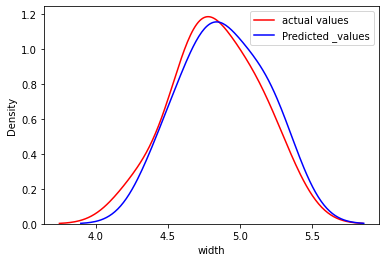

In [13]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_pr,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

# Depth of pentration

In [14]:
x=df.iloc[:,:4]
y=df['DOP']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.2,random_state=43)

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
regressor_d = LinearRegression()
regressor_d.fit(X_train, y_train)
y_pred_d = regressor_d.predict(X_test)
r2_score(y_test, y_pred_d)

0.9214751476083833

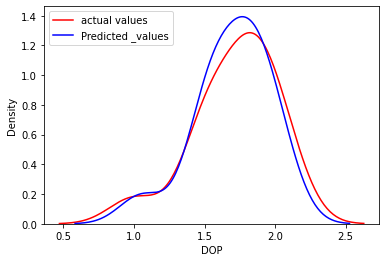

In [18]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_d,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

<AxesSubplot:>

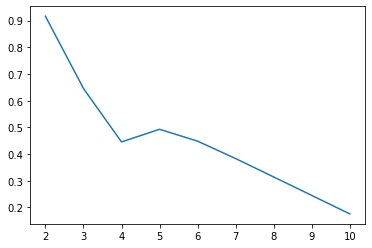

In [19]:
requ_test=[]
order=[2,3,4,5,6,7,8,9,10]
for i in order:
  pr=PolynomialFeatures(degree=i)
  x_train_pr=pr.fit_transform(X_train)
  x_test_pr=pr.fit_transform(X_test)
  regressor.fit(x_train_pr,y_train)
  requ_test.append(regressor.score(x_test_pr,y_test))
sns.lineplot(x=order,y=requ_test) 

In [20]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)
regressor = LinearRegression()
regressor.fit(x_train_pr,y_train)
y_pred_pr=regressor.predict(x_test_pr)
r2_score(y_pred_pr,y_test)

0.9268830427349437

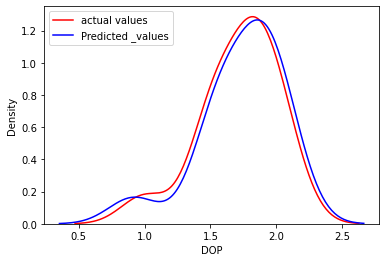

In [21]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_pr,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

In [22]:
y_pred_pr

array([1.59428602, 1.83343914, 1.55228035, 2.10099752, 1.97806594,
       1.99280272, 1.81488592, 0.91726469, 1.54095916, 1.83150503,
       1.85400186, 2.02524561, 1.53255699])

In [23]:
y_test

52    1.5
45    1.8
18    1.5
5     2.1
37    2.0
38    2.0
39    1.9
19    1.0
55    1.6
33    1.8
22    1.8
14    1.8
6     1.5
Name: DOP, dtype: float64

In [24]:
y_pred_train_pr=regressor.predict(x_train_pr)
r2_score(y_pred_train_pr,y_train)

0.9697526799450613

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rd=Ridge()
parameters={'alpha':[0.05,0.6,1,3]}
gr=GridSearchCV(rd,parameters,cv=20)
gr.fit(x_train_pr,y_train)
gr.best_params_

{'alpha': 0.05}

In [26]:
gr_pred_d=gr.predict(x_test_pr)
r2_score(gr_pred_d,y_test)

0.9551056722246177

In [27]:
y_test

52    1.5
45    1.8
18    1.5
5     2.1
37    2.0
38    2.0
39    1.9
19    1.0
55    1.6
33    1.8
22    1.8
14    1.8
6     1.5
Name: DOP, dtype: float64

In [28]:
gr_pred_d

array([1.54337039, 1.84741301, 1.50599497, 2.07064887, 1.9526032 ,
       1.99006584, 1.76772827, 1.04761011, 1.55746389, 1.77952561,
       1.8573027 , 1.87719176, 1.54358906])

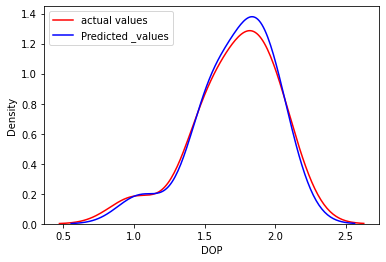

In [29]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(gr_pred_d,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

# Throat length

In [30]:
x=df.iloc[:,:4]
y=df['Throat ']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.20,random_state=43)

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.7239507473225555

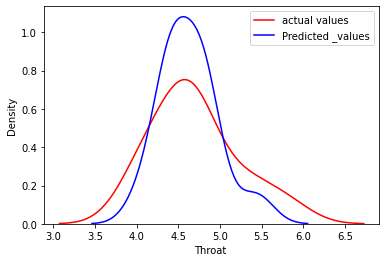

In [34]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

<AxesSubplot:>

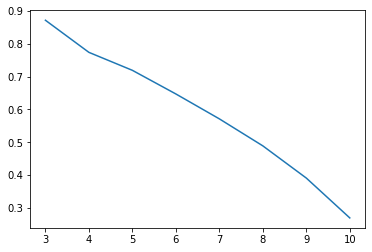

In [35]:
requ_test=[]
order=[3,4,5,6,7,8,9,10]
for i in order:
  pr=PolynomialFeatures(degree=i)
  x_train_pr=pr.fit_transform(X_train)
  x_test_pr=pr.fit_transform(X_test)
  regressor.fit(x_train_pr,y_train)
  requ_test.append(regressor.score(x_test_pr,y_test))
sns.lineplot(x=order,y=requ_test) 

In [36]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)
regressor.fit(x_train_pr,y_train)
y_pred_pr=regressor.predict(x_test_pr)
r2_score(y_pred_pr,y_test)

0.9453847573065642

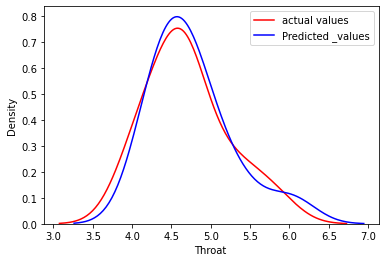

In [37]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_pr,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

In [38]:
y_pred_train_pr=regressor.predict(x_train_pr)
r2_score(y_pred_train_pr,y_train)

0.9828144194660353

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rd=Ridge()
parameters={'alpha':[0.003,0.002,1,3]}
gr=GridSearchCV(rd,parameters,cv=10)
gr.fit(x_train_pr,y_train)
gr.best_params_

{'alpha': 0.002}

In [40]:
gr_pred=gr.predict(x_test_pr)
r2_score(gr_pred,y_test)

0.9472902501325424

# Leg size

In [41]:
x=df.iloc[:,:4]
y=df['Leg size']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.25,random_state=43)

In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.6066018434141054

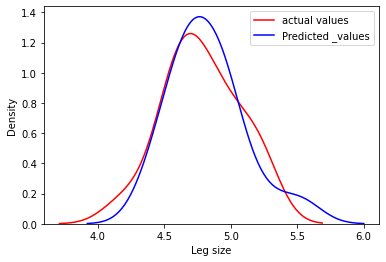

In [45]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

<AxesSubplot:>

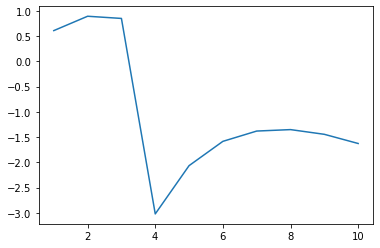

In [46]:
requ_test=[]
order=[1,2,3,4,5,6,7,8,9,10]
for i in order:
  pr=PolynomialFeatures(degree=i)
  x_train_pr=pr.fit_transform(X_train)
  x_test_pr=pr.fit_transform(X_test)
  regressor.fit(x_train_pr,y_train)
  requ_test.append(regressor.score(x_test_pr,y_test))
sns.lineplot(x=order,y=requ_test) 

In [47]:
pr=PolynomialFeatures(degree=2)
x_train_pr_l=pr.fit_transform(X_train)
x_test_pr_l=pr.fit_transform(X_test)
regressor.fit(x_train_pr_l,y_train)
y_pred_pr_l=regressor.predict(x_test_pr_l)
r2_score(y_test,y_pred_pr_l)

0.8908445373422028

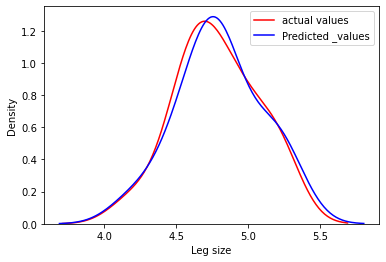

In [48]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual values')
sns.distplot(y_pred_pr_l,hist=False,color='b',label='Predicted _values',ax=ax1)
plt.legend()

In [49]:
y_pred_train_pr=regressor.predict(x_train_pr_l)
r2_score(y_pred_train_pr,y_train)

0.9825231424936426

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rd=Ridge()
parameters={'alpha':[.003,.001,.0009,1,3]}
gr=GridSearchCV(rd,parameters,cv=10)
gr.fit(x_train_pr_l,y_train)
gr.best_params_

{'alpha': 0.003}

In [51]:
gr_pred=gr.predict(x_test_pr_l)
r2_score(gr_pred,y_test)

0.9015850031080079

In [52]:
gr_pred

array([4.72894719, 5.29413403, 4.52427851, 5.18604992, 4.76789737,
       4.57678285, 4.88072241, 4.2031069 , 4.44442958, 4.87017459,
       4.83676045, 5.10916803, 4.7358732 , 4.71864387, 4.72654171,
       5.18653685])

In [53]:
y_test

52    4.7
45    5.0
18    4.5
5     5.2
37    4.7
38    4.6
39    4.9
19    4.2
55    4.5
33    4.9
22    4.9
14    5.2
6     4.7
50    4.6
13    4.7
54    5.2
Name: Leg size, dtype: float64